In [1]:
from pyforest import*
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\ezprapr\\Downloads\\PYTHoN'

In [4]:
home = pd.read_csv('housing.csv')


In [5]:
home.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
home.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [7]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
home.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
home.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

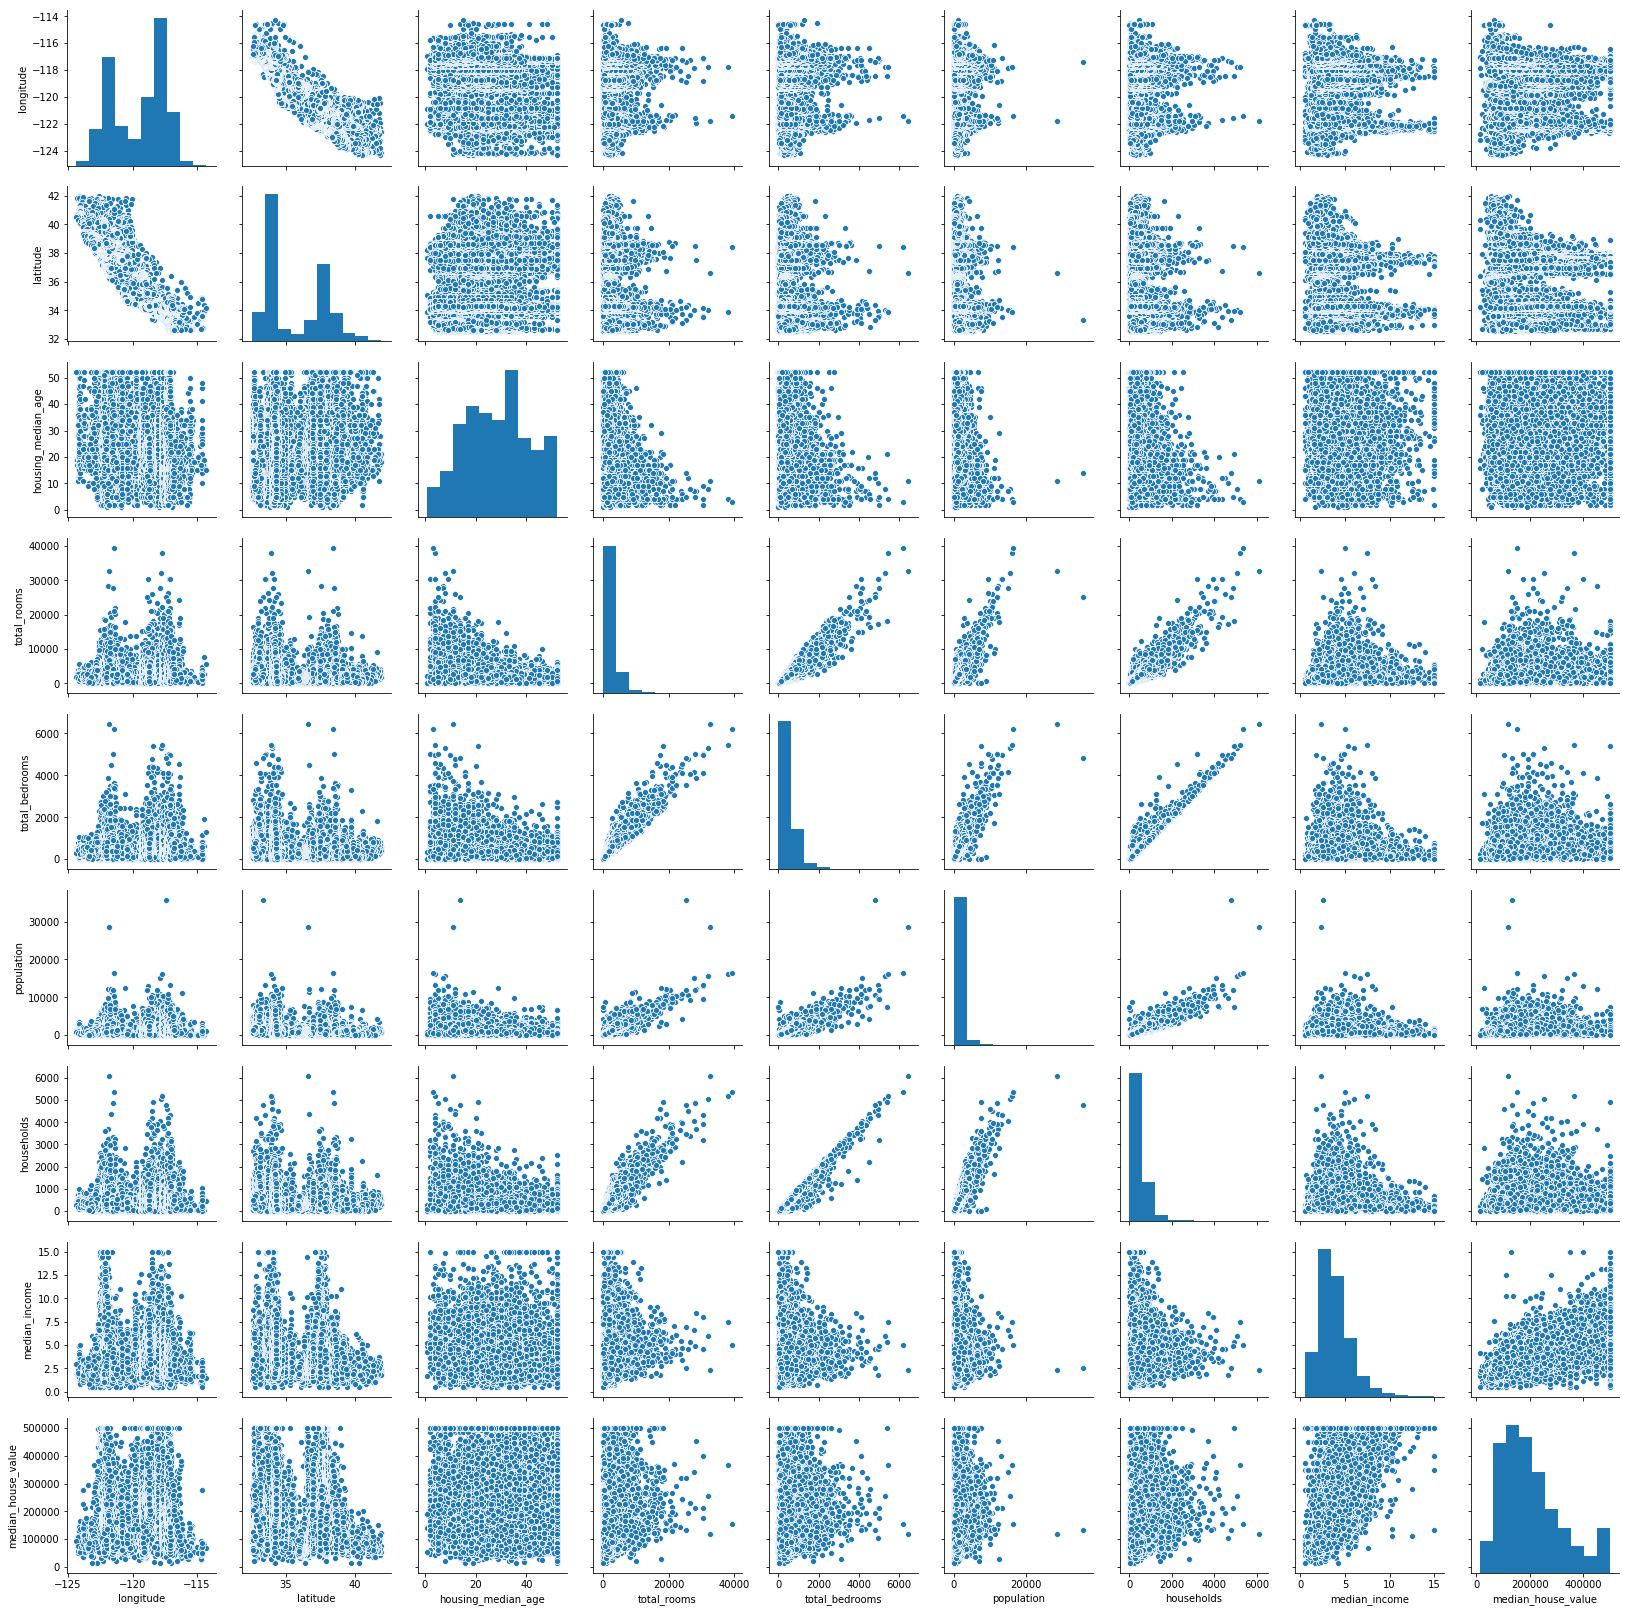

In [9]:
sns.pairplot(home)

In [7]:
home.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [71]:
home[home['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


In [73]:
home.loc[290]

longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms             NaN
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

In [87]:
#handling missing values
median = home['total_bedrooms'].median()
home['total_bedrooms'].fillna(median,inplace=True)
home.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
avg_rooms             False
avg_bedrooms          False
pop_household         False
NEAR BAY              False
INLAND                False
<1H OCEAN             False
ISLAND                False
NEAR OCEAN            False
dtype: bool

In [14]:
mean = home['total_bedrooms'].mean()
home['total_bedrooms'].fillna(mean,inplace=True)
home.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [74]:
#different process of filling NA values
home['total_bedrooms'][home['total_bedrooms'].isnull()] = np.mean(home['total_bedrooms'])
home.loc[290]

longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms         537.871
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

In [75]:
home['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
225000.0     92
350000.0     79
87500.0      78
275000.0     65
150000.0     64
175000.0     63
100000.0     62
125000.0     56
67500.0      55
250000.0     47
200000.0     46
118800.0     39
450000.0     37
156300.0     35
212500.0     33
193800.0     31
181300.0     31
300000.0     30
75000.0      30
81300.0      29
55000.0      29
93800.0      29
106300.0     28
143800.0     28
400000.0     27
           ... 
373500.0      1
433000.0      1
354600.0      1
389700.0      1
370100.0      1
304200.0      1
477200.0      1
422500.0      1
445900.0      1
309000.0      1
413100.0      1
465700.0      1
353700.0      1
438900.0      1
396700.0      1
380300.0      1
478500.0      1
455300.0      1
403000.0      1
363900.0      1
494400.0      1
389800.0      1
347500.0      1
487000.0      1
331100.0      1
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value

In [16]:
 home.loc[1:2]
    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [63]:
df =home.groupby('ocean_proximity',axis=0)
df

In [76]:
df.population.value_counts()

ocean_proximity  population
<1H OCEAN        891.0         17
                 850.0         13
                 1158.0        13
                 679.0         12
                 735.0         12
                 926.0         12
                 1052.0        12
                 1227.0        12
                 662.0         11
                 719.0         11
                 761.0         11
                 825.0         11
                 826.0         11
                 835.0         11
                 965.0         11
                 1047.0        11
                 1065.0        11
                 1203.0        11
                 1369.0        11
                 671.0         10
                 807.0         10
                 814.0         10
                 862.0         10
                 883.0         10
                 956.0         10
                 975.0         10
                 981.0         10
                 982.0         10
                 101

In [19]:
home.households.value_counts()

306.0     57
386.0     56
335.0     56
282.0     55
429.0     54
375.0     53
284.0     51
297.0     51
362.0     50
380.0     50
278.0     50
340.0     50
316.0     49
329.0     49
319.0     49
330.0     49
377.0     48
309.0     48
426.0     48
341.0     48
357.0     47
352.0     46
363.0     46
410.0     46
269.0     46
332.0     46
274.0     46
338.0     46
389.0     46
295.0     46
          ..
2350.0     1
1080.0     1
1946.0     1
1523.0     1
1546.0     1
2777.0     1
1313.0     1
5358.0     1
1511.0     1
1114.0     1
1763.0     1
1285.0     1
3478.0     1
3671.0     1
2654.0     1
1911.0     1
1411.0     1
1153.0     1
1486.0     1
2962.0     1
2036.0     1
1816.0     1
1710.0     1
1858.0     1
1385.0     1
1506.0     1
1765.0     1
1338.0     1
2333.0     1
1455.0     1
Name: households, Length: 1815, dtype: int64

In [78]:
home.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


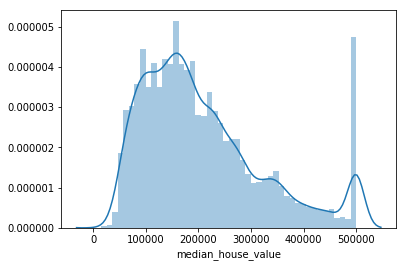

In [81]:
sns.distplot(home['median_house_value'])

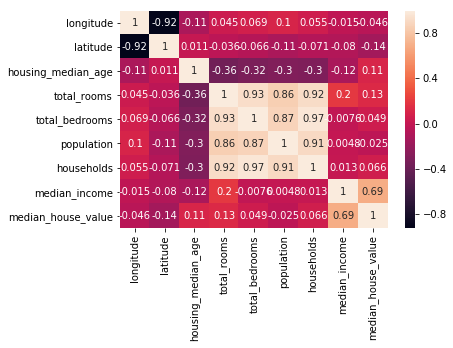

In [11]:
sns.heatmap(home.corr(),annot=True)

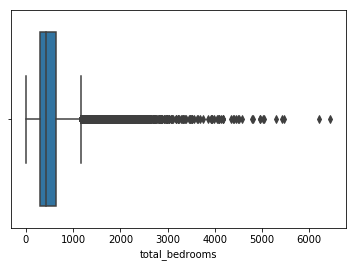

In [23]:
sns.boxplot(home['total_bedrooms'])

[]

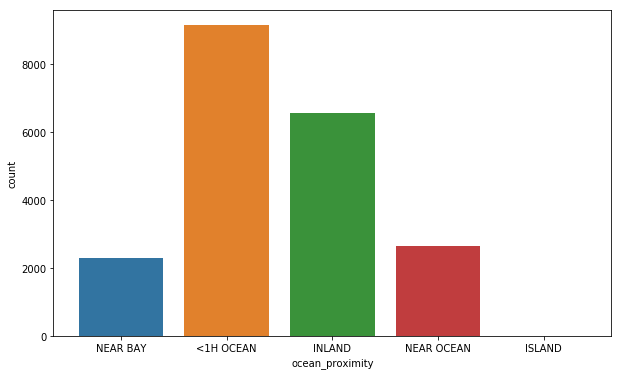

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=home,x='ocean_proximity')
plt.plot()

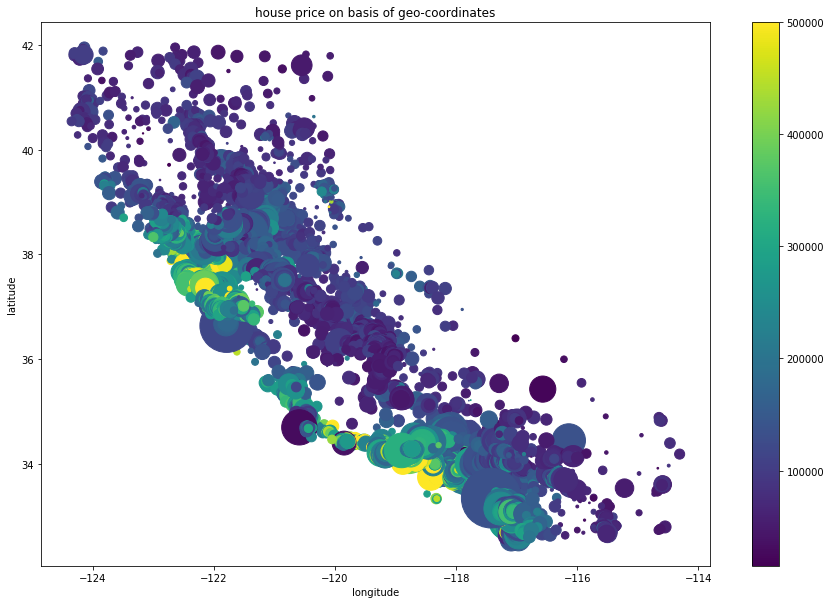

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(home['longitude'],home['latitude'],c=home['median_house_value'],s=home['population']/10,cmap='viridis')
plt.colorbar()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('house price on basis of geo-coordinates')
plt.show()

[]

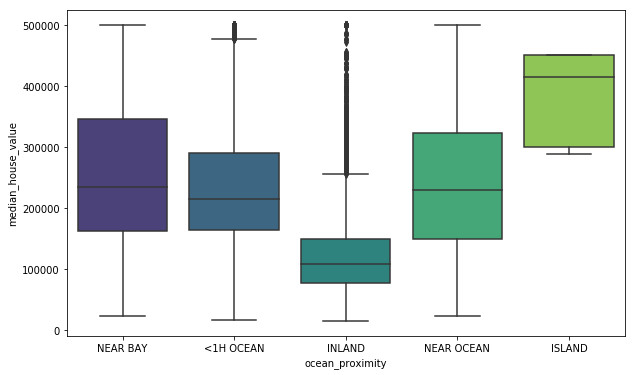

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=home,x='ocean_proximity',y='median_house_value',palette='viridis')
plt.plot()

In [32]:
home_cat = home['ocean_proximity']
home_cat.head(10)

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
5    NEAR BAY
6    NEAR BAY
7    NEAR BAY
8    NEAR BAY
9    NEAR BAY
Name: ocean_proximity, dtype: object

In [33]:
home_cat.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
home['avg_rooms'] = home['total_rooms']/home['households']
home['avg_bedrooms'] = home['total_bedrooms']/home['households']
home[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,1.103627
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.951362
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,1.061824
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,1.117647
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.990196


In [38]:
home['pop_household'] = home['population']/home['households']
home.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [40]:
#to convert the categorical variable to compare 
home['NEAR BAY']=0
home['INLAND']=0
home['<1H OCEAN']=0
home['ISLAND']=0
home['NEAR OCEAN']=0
home.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,0,0


In [42]:
home.loc[home['ocean_proximity']=='NEAR BAY','NEAR BAY']=1
home.loc[home['ocean_proximity']=='INLAND','INLAND']=1
home.loc[home['ocean_proximity']=='<1H OCEAN','<1H OCEAN']=1
home.loc[home['ocean_proximity']=='ISLAND','ISLAND']=1
home.loc[home['ocean_proximity']=='NEAR OCEAN','NEAR OCEAN']=1
home.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,pop_household,NEAR BAY,INLAND,<1H OCEAN,ISLAND,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,1,0,0,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,1,0,0,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,1,0,0,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,1,0,0,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,1,0,0,0,0


In [52]:
#applying linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


train_x = home.drop(['total_rooms','total_bedrooms','households',
                        'ocean_proximity','median_house_value'],axis=1)
train_y = home['median_house_value']

X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.3)

In [57]:
clf = LinearRegression()
clf.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
print(clf.intercept_)

-2207199.173848705


In [63]:
clf.coef_

array([-2.64067248e+04, -2.48376836e+04,  8.28891934e+02, -1.83363783e-01,
        3.82541061e+04, -1.71090952e+03,  1.70882905e+04, -3.46664856e+02,
       -2.21141113e+04, -6.90745800e+04, -2.66200357e+04,  1.35320849e+05,
       -1.75121216e+04])

In [65]:
train_x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'population',
       'median_income', 'avg_rooms', 'avg_bedrooms', 'pop_household',
       'NEAR BAY', 'INLAND', '<1H OCEAN', 'ISLAND', 'NEAR OCEAN'],
      dtype='object')

In [59]:
import math

def roundup(x):
   return int(math.ceil(x / 100.0)) * 100 
pred = list(map(roundup,clf.predict(test_x)))

print(pred[:10])
test_y[:10]

[215800, 220200, 151000, 54500, 219400, 191000, 317300, 130300, 173400, 84200]


17753    182400.0
20481    250000.0
14119     84400.0
2003      39600.0
8422     192800.0
14873    129700.0
20360    299400.0
11534     46700.0
4571     152100.0
20013     79800.0
Name: median_house_value, dtype: float64

In [66]:
from sklearn.metrics import mean_squared_error

predictions = clf.predict(test_x)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
rmse

72556.35570566221

In [71]:
hcdf = pd.DataFrame(clf.coef_,X.columns,columns=['coef'])
hcdf.head()

,coef
longitude,-26406.724765
latitude,-24837.683625
housing_median_age,828.891934
population,-0.183364
median_income,38254.106139


In [76]:
#predictions
Prediction_test = clf.predict(test_x)
Prediction_test

array([215714.29999745, 220154.0175035 , 150920.23876526, ...,
        77209.05037802, 204608.16179277, 261543.69935442])

In [79]:
Prediction_train = clf.predict(train_x)
Prediction_train


array([414587.86162519, 397494.50448327, 382366.87447029, ...,
        33766.08823639,  44424.22770349,  61763.20242685])

In [83]:
test_y

17753    182400.0
20481    250000.0
14119     84400.0
2003      39600.0
8422     192800.0
14873    129700.0
20360    299400.0
11534     46700.0
4571     152100.0
20013     79800.0
7565     107300.0
9212      46300.0
17973    264600.0
8536     240000.0
20542    236200.0
9792     387500.0
4689     355200.0
20602     69700.0
8058     150300.0
8605     281900.0
9114     222400.0
4874     187500.0
19057     81300.0
14999    129700.0
3638     184600.0
1080      94800.0
5347     500001.0
6495     181700.0
10913    180200.0
18419    218700.0
           ...   
10756    500001.0
5068      93300.0
2770      67500.0
8176     243300.0
15825    400000.0
5006     123400.0
6330     284000.0
18555    284200.0
10076    122100.0
11449    281900.0
16064    311800.0
589      195800.0
8723     342800.0
876      158000.0
16592    134700.0
4319     500001.0
4688     500001.0
1521     259800.0
13738    137500.0
18897    109800.0
637      141700.0
12006    220800.0
7199     145600.0
10863    184900.0
3371     2

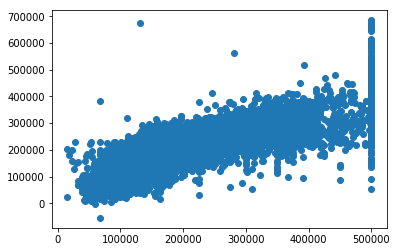

In [86]:
plt.scatter(test_y,Prediction_test)

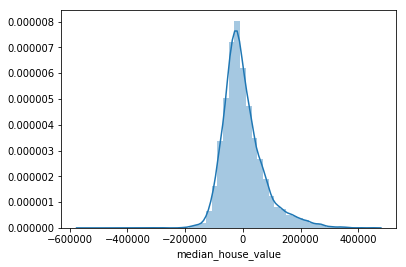

In [89]:
sns.distplot((test_y-Prediction_test))